In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [26]:
df = pd.read_csv('Student_Performance.csv')

In [35]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
170,7,58,Yes,6,2,51.0
9175,2,42,No,9,2,20.0
672,6,83,No,7,0,68.0
6322,6,88,No,4,6,78.0
133,9,51,No,6,7,49.0


In [36]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [43]:
## checking null and removing duplicating

print("initial shape :" ,df.shape)
print("null valus count : " ,df.isnull().sum().sum())

## checking duplicate

print("number of duplicates: ",df.duplicated().sum())

## removing duplicates item
df=df.drop_duplicates()

print("final shape : " ,df.shape)

initial shape : (10000, 6)
null valus count :  0
number of duplicates:  127
final shape :  (9873, 6)


In [45]:
## data pre processing
encoder = LabelEncoder()
df["Extracurricular Activities"] = encoder.fit_transform(df['Extracurricular Activities'])

In [46]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
16,8,73,1,8,4,67.0
7781,2,96,0,4,7,75.0
2141,8,54,0,8,9,49.0
5223,8,74,0,7,7,68.0
8334,4,97,0,4,1,81.0


In [47]:
## correlation matrix to analyze correlations and dependencies

correlation_matrix = df.corr(numeric_only=True)

In [49]:
correlation_matrix



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


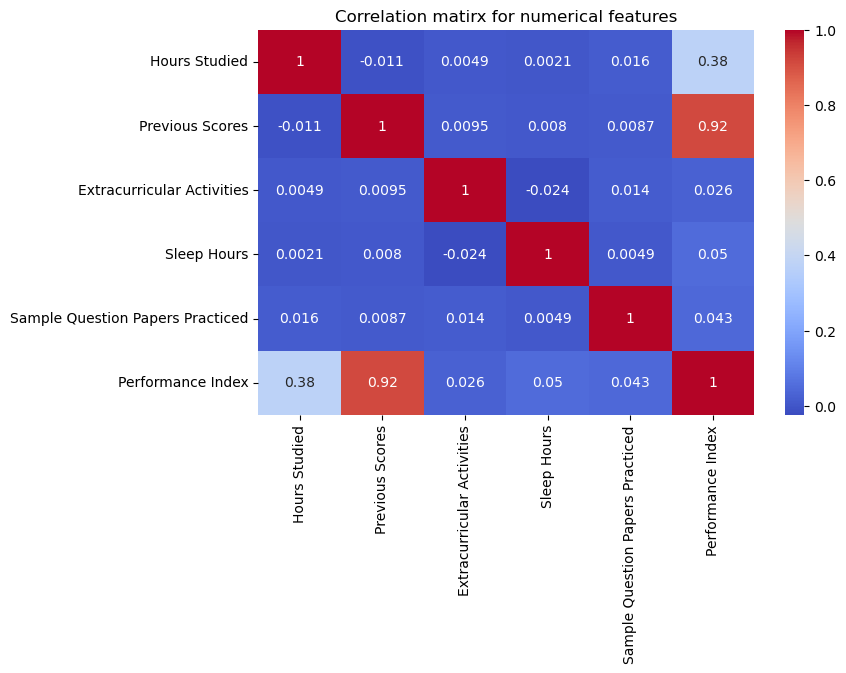

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm')
plt.title("Correlation matirx for numerical features")
# plt.tight_layout()
plt.show()

#### Here we are removing Extracurricular Activities , Sleep Hours , Sample Question Papers Practiced  because this are not correlated much 

In [62]:
columns=["Extracurricular Activities" , 'Sleep Hours' , 'Sample Question Papers Practiced']

df.drop(columns , axis=1 ,inplace=True)

In [63]:
df

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
...,...,...,...
9995,1,49,23.0
9996,7,64,58.0
9997,6,83,74.0
9998,9,97,95.0


####  here we see that hours column and previous score column have very high difference in valuse so , we need to perform standardization


In [64]:
X = df.drop("Performance Index" ,axis=1)
y = df["Performance Index"]



In [67]:
scaler = StandardScaler()
X_Scaled = pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)

In [68]:
X_Scaled_train , X_Scaled_test , y_train ,y_test = train_test_split(X_Scaled , y , test_size=0.2,random_state=42)
print(X_Scaled_train.shape , X_Scaled_test.shape , y_train.shape , y_test.shape)

(7898, 2) (1975, 2) (7898,) (1975,)


In [70]:
##
model = LinearRegression()

model.fit(X_Scaled_train,y_train)


LinearRegression()

In [71]:
y_pred = model.predict(X_Scaled_test)

In [82]:
print("R2 Score :" ,r2_score(y_test,y_pred))
print("mean squared error :" ,mean_squared_error(y_test,y_pred))

R2 Score : 0.9850233951895029
mean squared error : 5.573764139536917


In [88]:
y_ped=model.predict(X_Scaled_test)

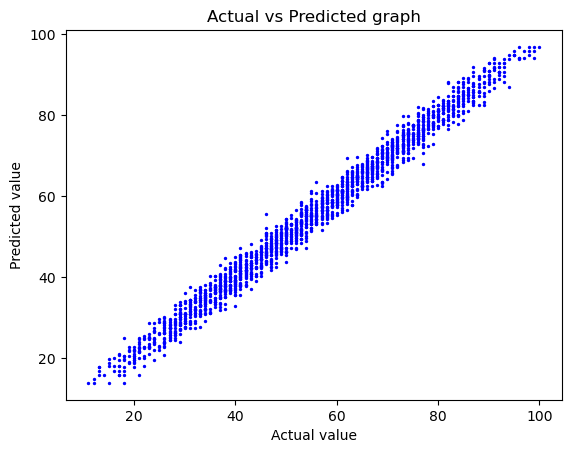

In [91]:
## visualization of best fit line
plt.scatter(y_test, y_pred,color='blue',s=2 ,label="actual")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted graph")
plt.show()

## Thank you